<a href="https://colab.research.google.com/github/VitalyGladyshev/NeuroN/blob/master/HW_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ_06

## Задание 1

Попробуйте обучить нейронную сеть U-Net на любом другом датасете. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-6rve88ax
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-6rve88ax
  Created wheel for tensorflow-examples: filename=tensorflow_examples-de42482b453de6f7b6488203b20e7eec61ee722e_-cp36-none-any.whl size=137062 sha256=228d5efd222ec780160cd3507feced716a9c43074a4a8fcc254eeb9dbbf61718
  Stored in directory: /tmp/pip-ephem-wheel-cache-bo7pprjh/wheels/83/64/b3/4cfa02dc6f9d16bf7257892c6a7ec602cd7e0ff6ec4d7d714d
Successfully built tensorflow-examples


In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix

In [ ]:
!ls -la

total 206560
drwxr-xr-x 1 root root      4096 Sep 18 06:56 .
drwxr-xr-x 1 root root      4096 Sep 18 06:29 ..
drwxr-xr-x 5 root root      4096 Sep 18 06:54 cityscapes_data
-rw-r--r-- 1 root root 211492512 Sep 18 06:45 cityscapes-image-pairs.zip
drwxr-xr-x 1 root root      4096 Sep 16 16:29 .config
drwxr-xr-x 1 root root      4096 Sep 16 16:29 sample_data


In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vitalygladyshev","key":"3353367a1e22b48542ed3c3946bdf3e4"}'}

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -la ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Sep 18 06:36 .
drwx------ 1 root root 4096 Sep 18 06:30 ..
-rw------- 1 root root   71 Sep 18 06:36 kaggle.json


In [ ]:
!kaggle datasets list -s cityscapes

ref                                               title                                 size  lastUpdated          downloadCount  
------------------------------------------------  -----------------------------------  -----  -------------------  -------------  
dansbecker/cityscapes-image-pairs                 Cityscapes Image Pairs               202MB  2018-04-20 13:55:20           2720  
vikramtiwari/pix2pix-dataset                      pix2pix dataset                        2GB  2018-07-04 05:54:59           1618  
xiaose/cityscapes                                 cityscapes                             8GB  2020-05-10 11:27:21             15  
jqeric/cityscapesscripts150                       cityscapesScripts150                 415KB  2020-06-20 04:27:33              2  
zhangyunsheng/cityscapes-data                     cityscapes_data                      101MB  2020-06-18 07:11:17              7  
huweicom/cityscapes-train                         cityscapes_train                 

In [ ]:
!kaggle datasets list -s dansbecker

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
dansbecker/melbourne-housing-snapshot                       Melbourne Housing Snapshot                         451KB  2018-06-05 12:52:24          43439  
dansbecker/nba-shot-logs                                    NBA shot logs                                        3MB  2016-08-18 05:16:10          11009  
dansbecker/cityscapes-image-pairs                           Cityscapes Image Pairs                             202MB  2018-04-20 13:55:20           2720  
dansbecker/food-101                                         Food 101                                             9GB  2018-01-03 20:44:28           3939  
dansbecker/hot-dog-not-hot-dog                              Hot Dog - 

In [ ]:
!kaggle datasets list -s "dansbecker cityscapes"

ref                                title                    size  lastUpdated          downloadCount  
---------------------------------  ----------------------  -----  -------------------  -------------  
dansbecker/cityscapes-image-pairs  Cityscapes Image Pairs  202MB  2018-04-20 13:55:20           2720  


In [ ]:
!kaggle datasets download -d dansbecker/cityscapes-image-pairs
!ls

 96% 193M/202M [00:01<00:00, 122MB/s]
100% 202M/202M [00:01<00:00, 110MB/s]
cityscapes-image-pairs.zip  kaggle.json  sample_data


In [ ]:
!rm kaggle.json

In [ ]:
! ls -la

total 206556
drwxr-xr-x 1 root root      4096 Sep 18 06:47 .
drwxr-xr-x 1 root root      4096 Sep 18 06:29 ..
-rw-r--r-- 1 root root 211492512 Sep 18 06:45 cityscapes-image-pairs.zip
drwxr-xr-x 1 root root      4096 Sep 16 16:29 .config
drwxr-xr-x 1 root root      4096 Sep 16 16:29 sample_data


In [ ]:
from zipfile import ZipFile
zip_file = ZipFile('cityscapes-image-pairs.zip')

In [ ]:
zip_file.extractall("./cityscapes_image_pairs")

In [ ]:
!ls -la ./cityscapes_image_pairs

total 12
drwxr-xr-x 3 root root 4096 Sep 18 06:54 .
drwxr-xr-x 1 root root 4096 Sep 18 06:54 ..
drwxr-xr-x 5 root root 4096 Sep 18 06:54 cityscapes_data


In [ ]:
!mv ./cityscapes_image_pairs/cityscapes_data ./

In [ ]:
!ls -la

total 206564
drwxr-xr-x 1 root root      4096 Sep 18 06:55 .
drwxr-xr-x 1 root root      4096 Sep 18 06:29 ..
drwxr-xr-x 5 root root      4096 Sep 18 06:54 cityscapes_data
drwxr-xr-x 2 root root      4096 Sep 18 06:55 cityscapes_image_pairs
-rw-r--r-- 1 root root 211492512 Sep 18 06:45 cityscapes-image-pairs.zip
drwxr-xr-x 1 root root      4096 Sep 16 16:29 .config
drwxr-xr-x 1 root root      4096 Sep 16 16:29 sample_data


In [ ]:
!rmdir cityscapes_image_pairs

In [ ]:
!ls -la ./cityscapes_data

total 92
drwxr-xr-x 5 root root  4096 Sep 18 06:54 .
drwxr-xr-x 1 root root  4096 Sep 18 06:56 ..
drwxr-xr-x 4 root root  4096 Sep 18 06:54 cityscapes_data
drwxr-xr-x 2 root root 69632 Sep 18 06:54 train
drwxr-xr-x 2 root root 12288 Sep 18 06:54 val


In [ ]:
import os, fnmatch
imag_train = os.listdir('./cityscapes_data/train')
imag_val = os.listdir('./cityscapes_data/val')

In [ ]:
imag_train[:10], imag_val[:10]

(['2403.jpg',
  '253.jpg',
  '2541.jpg',
  '926.jpg',
  '699.jpg',
  '2153.jpg',
  '1250.jpg',
  '642.jpg',
  '1700.jpg',
  '2165.jpg'],
 ['253.jpg',
  '238.jpg',
  '143.jpg',
  '82.jpg',
  '42.jpg',
  '438.jpg',
  '350.jpg',
  '259.jpg',
  '459.jpg',
  '419.jpg'])

In [ ]:
from tensorflow.keras.preprocessing import image

253.jpg


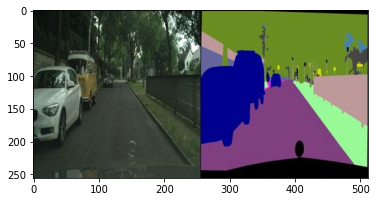

In [ ]:
print(imag_train[1])
plt.imshow(image.load_img("./cityscapes_data/train/"+imag_train[1]).convert('RGBA'))
plt.show()

253.jpg


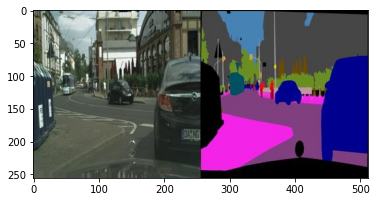

In [ ]:
print(imag_val[0])
plt.imshow(image.load_img("./cityscapes_data/val/"+imag_val[0]).convert('RGBA'))
plt.show()

In [ ]:
img_sm = image.load_img("./cityscapes_data/train/"+imag_train[1])

In [ ]:
img_sm.height, img_sm.width

(256, 512)

In [ ]:
import cv2
import os
from tqdm import tqdm
from PIL import Image

In [ ]:
train_images=[]
train_masks=[]
val_images=[]
val_masks=[]

train_path = "./cityscapes_data/train/"
val_path = "./cityscapes_data/val/"

def load_images(path):
    imag_lst = os.listdir(path)
    temp_img,temp_mask=[],[]
    # images=glob(os.path.join(path,'*.jpg'))
    for i in tqdm(map(lambda x: os.path.join(path, x), imag_lst)):
        # im = np.array(image.load_img(i))
        im=cv2.imread(i)
        im=cv2.normalize(im,None,0,1,cv2.NORM_MINMAX,cv2.CV_32F)
        img=im[:,:256]
        msk=im[:,256:]
        temp_img.append(img)
        temp_mask.append(msk)
    return np.array(temp_img),np.array(temp_mask)

train_images, train_masks = load_images(train_path)
val_images, val_masks = load_images(val_path)

2975it [00:10, 280.77it/s]
500it [00:01, 337.54it/s]


In [ ]:
print(train_images.shape)
print(train_masks.shape)
print(val_images.shape)
print(val_masks.shape)

(2975, 256, 256, 3)
(2975, 256, 256, 3)
(500, 256, 256, 3)
(500, 256, 256, 3)


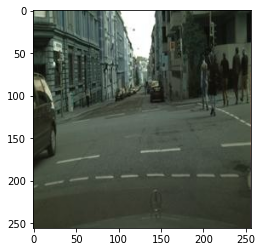

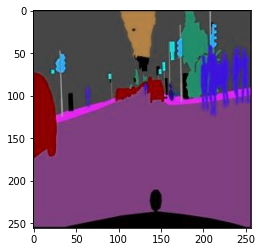

In [ ]:
plt.imshow(train_images[0])
plt.show()

plt.imshow(train_masks[0])
plt.show()

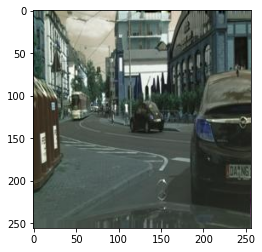

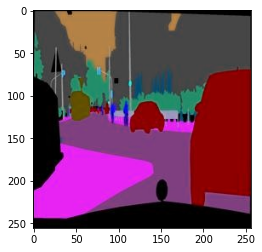

In [ ]:
plt.imshow(val_images[0])
plt.show()

plt.imshow(val_masks[0])
plt.show()

<h2 id="class-definitions" class="offset">Class Definitions</h2>
<table id="tablepress-1" class="tablepress tablepress-id-1 tablepress-responsive">
<thead>
<tr class="row-1 odd">
	<th class="column-1">Group</th><th class="column-2">Classes</th>
</tr>
</thead>
<tbody class="row-hover">
<tr class="row-2 even">
	<td class="column-1">flat</td><td class="column-2"><span class="tooltips " style="color:#0088cc;" title="">road</span> · <span class="tooltips " style="color:#0088cc;" title="">sidewalk</span> · <span class="tooltips " style="color:#0088cc;" title="">parking<sup>+</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">rail track<sup>+</sup></span></td>
</tr>
<tr class="row-3 odd">
	<td class="column-1">human</td><td class="column-2"><span class="tooltips " style="color:#0088cc;" title="">person<sup>*</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">rider<sup>*</sup></span><br>
</td>
</tr>
<tr class="row-4 even">
	<td class="column-1">vehicle</td><td class="column-2"><span class="tooltips " style="color:#0088cc;" title="">car<sup>*</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">truck<sup>*</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">bus<sup>*</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">on rails<sup>*</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">motorcycle<sup>*</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">bicycle<sup>*</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">caravan<sup>*+</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">trailer<sup>*+</sup></span></td>
</tr>
<tr class="row-5 odd">
	<td class="column-1">construction</td><td class="column-2"><span class="tooltips " style="color:#0088cc;" title="">building</span> · <span class="tooltips " style="color:#0088cc;" title="">wall</span> · <span class="tooltips " style="color:#0088cc;" title="">fence</span> · <span class="tooltips " style="color:#0088cc;" title="">guard rail<sup>+</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">bridge<sup>+</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">tunnel<sup>+</sup></span></td>
</tr>
<tr class="row-6 even">
	<td class="column-1">object</td><td class="column-2"><span class="tooltips " style="color:#0088cc;" title="">pole</span> · <span class="tooltips " style="color:#0088cc;" title="">pole group<sup>+</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">traffic sign</span> · <span class="tooltips " style="color:#0088cc;" title="">traffic light</span> </td>
</tr>
<tr class="row-7 odd">
	<td class="column-1">nature</td><td class="column-2"><span class="tooltips " style="color:#0088cc;" title="">vegetation</span> · <span class="tooltips " style="color:#0088cc;" title="">terrain</span></td>
</tr>
<tr class="row-8 even">
	<td class="column-1">sky</td><td class="column-2"><span class="tooltips " style="color:#0088cc;" title="">sky</span></td>
</tr>
<tr class="row-9 odd">
	<td class="column-1">void</td><td class="column-2"><span class="tooltips " style="color:#0088cc;" title="">ground<sup>+</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">dynamic<sup>+</sup></span> · <span class="tooltips " style="color:#0088cc;" title="">static<sup>+</sup></span></td>
</tr>
</tbody>
</table>

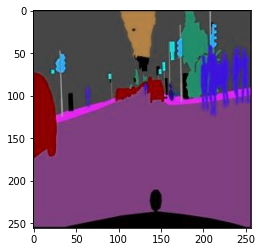

In [ ]:
plt.imshow(train_masks[0])
plt.show()

In [ ]:
train_masks[0, 100, 100, :]

array([0.5294118 , 0.00784314, 0.        ], dtype=float32)

In [ ]:
train_masks[0, 50, 200, :]

array([0.14901961, 0.43921572, 0.36862746], dtype=float32)

In [ ]:
train_masks[0, 210, 210, :]

array([0.49803925, 0.24705884, 0.5019608 ], dtype=float32)

__Не понимаю как это кодировать__

## Модель

In [ ]:
train_images=[]
train_masks=[]
val_images=[]
val_masks=[]

train_path = "./cityscapes_data/train/"
val_path = "./cityscapes_data/val/"

def load_images_128(path):
    imag_lst = os.listdir(path)
    temp_img,temp_mask=[],[]
    # images=glob(os.path.join(path,'*.jpg'))
    for i in tqdm(map(lambda x: os.path.join(path, x), imag_lst)):
        im = np.array(image.load_img(i))
        # im=cv2.imread(i)
        # im=cv2.normalize(im,None,0,1,cv2.NORM_MINMAX,cv2.CV_32F)
        img=im[:,:256]
        msk=im[:,256:]
        img_128 = tf.image.resize(img, (128, 128))
        msk_128 = tf.image.resize(msk, (128, 128))
        img_128_n = tf.cast(img_128, tf.float32) / 255.0
        img_128_n = tf.cast(msk_128, tf.float32) / 255.0
        temp_img.append(img_128_n.numpy())
        temp_mask.append(img_128_n.numpy())
    return temp_img, temp_mask

train_images, train_masks = load_images_128(train_path)
val_images, val_masks = load_images_128(val_path)

2975it [00:14, 210.72it/s]
500it [00:02, 222.72it/s]


In [ ]:
train_images[0].shape

(128, 128, 3)

In [ ]:
OUTPUT_CHANNELS = 14

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

In [ ]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs

    # Downsampling through the model
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

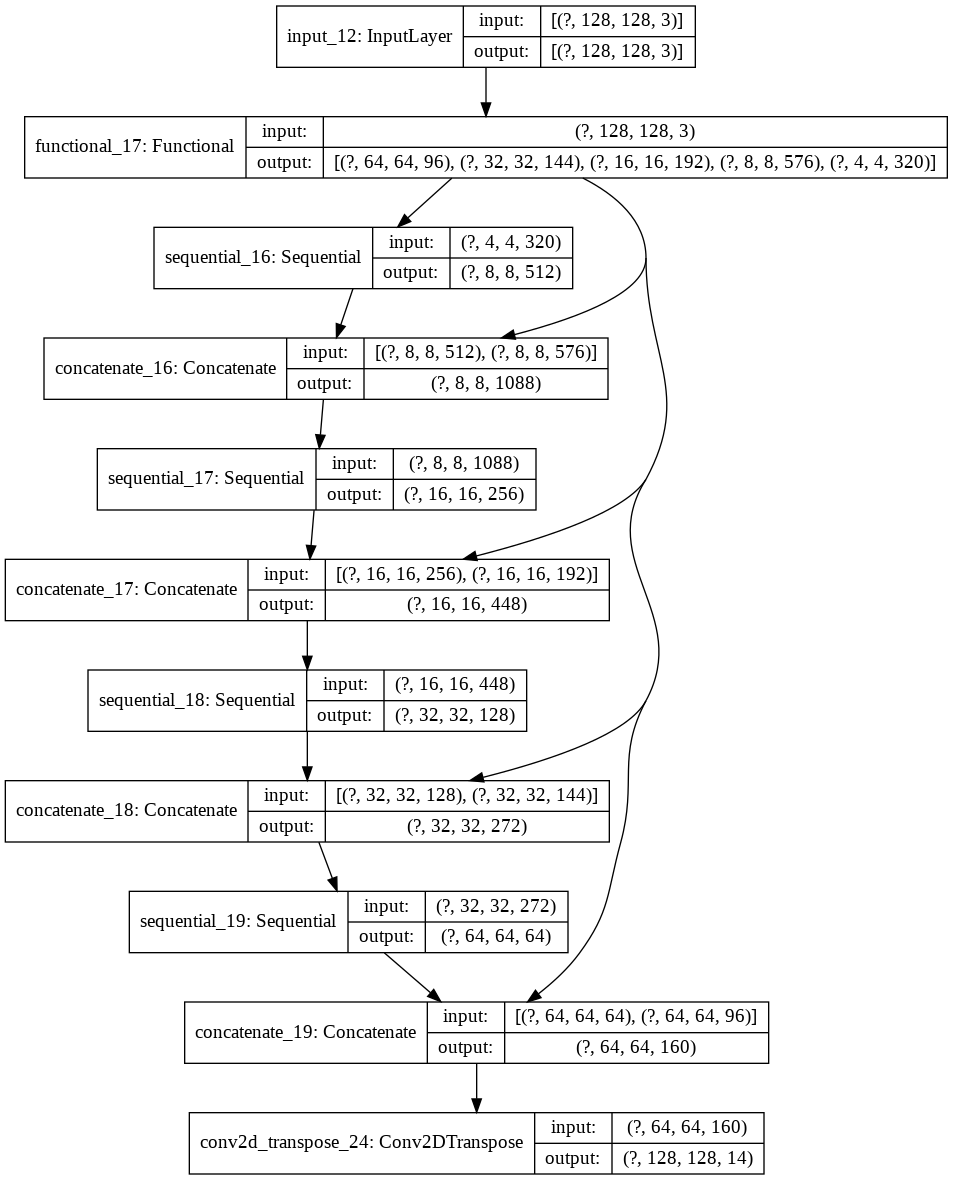

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [ ]:
# for image, mask in zip(train_images, train_masks):
#     pred_mask = model.predict(image)
#     break
#     # display([image, mask, create_mask(pred_mask)])

In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [ ]:
EPOCHS = 5 # увеличьте при необходимости
VAL_SUBSPLITS = 5
# VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit((train_images, train_masks), 
                          epochs=EPOCHS,
                        #   steps_per_epoch=STEPS_PER_EPOCH,
                        #   validation_steps=(VALIDATION_STEPS),
                          validation_data=(val_images, val_masks),
                          callbacks=[DisplayCallback()])

__Что-то пошло не так__

## Второй заход (подсмотрел на Kaggle - Yashwardhann Kumar)

In [ ]:
!kaggle datasets list -s "kumaresanmanickavelu lyft"

ref                                          title                                        size  lastUpdated          downloadCount  
-------------------------------------------  -------------------------------------------  ----  -------------------  -------------  
kumaresanmanickavelu/lyft-udacity-challenge  Semantic Segmentation for Self Driving Cars   5GB  2018-05-18 05:59:42           1604  


In [ ]:
!kaggle datasets download -d kumaresanmanickavelu/lyft-udacity-challenge
!ls -la

100% 5.10G/5.11G [01:45<00:00, 70.6MB/s]
100% 5.11G/5.11G [01:45<00:00, 51.9MB/s]
total 5357060
drwxr-xr-x 1 root root       4096 Sep 18 11:40 .
drwxr-xr-x 1 root root       4096 Sep 18 11:33 ..
drwxr-xr-x 1 root root       4096 Sep 16 16:29 .config
-rw-r--r-- 1 root root 5485605432 Sep 18 11:42 lyft-udacity-challenge.zip
drwxr-xr-x 1 root root       4096 Sep 16 16:29 sample_data


In [ ]:
from zipfile import ZipFile
zip_file = ZipFile('lyft-udacity-challenge.zip')

In [ ]:
zip_file.extractall("./lyft-udacity-challenge")

In [ ]:
!ls -la 

total 5357064
drwxr-xr-x  1 root root       4096 Sep 18 11:48 .
drwxr-xr-x  1 root root       4096 Sep 18 11:48 ..
drwxr-xr-x  1 root root       4096 Sep 16 16:29 .config
drwxr-xr-x 12 root root       4096 Sep 18 11:46 lyft-udacity-challenge
-rw-r--r--  1 root root 5485605432 Sep 18 11:42 lyft-udacity-challenge.zip
drwxr-xr-x  1 root root       4096 Sep 16 16:29 sample_data


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Conv2D, concatenate, Activation, MaxPooling2D, UpSampling2D, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import random

import os

In [ ]:
base_path = "./lyft-udacity-challenge/dataB/dataB/CameraRGB"
seg_path = "./lyft-udacity-challenge/dataB/dataB/CameraSeg"
image_paths = os.listdir(base_path)

print(f"Found {len(image_paths)} images!")

Found 1000 images!


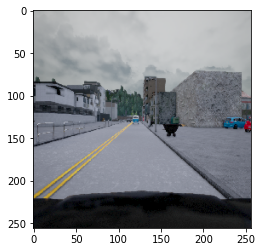

In [ ]:
def load_image(path): 
    img = load_img(path, target_size=(256, 256))
    img_arr = img_to_array(img)/255 
    
    return img_arr

index = random.randint(0, len(image_paths))
img = load_image(os.path.join(base_path, image_paths[index]))
plt.imshow(img)

Text(0.5, 1.0, 'Image Mask')

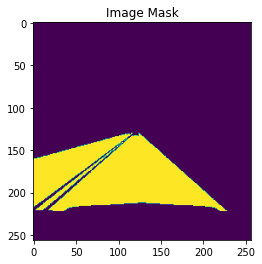

In [ ]:
def load_mask(path):
    mask = load_image(path)*255
    mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(mask.shape[0], mask.shape[1])
    mask = np.where(mask == 7, 1, 0)
    return mask

mask = load_mask(os.path.join(seg_path, image_paths[index]))
plt.imshow(mask)
plt.title("Image Mask")

In [ ]:
def unet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs, conv10)

    model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [ ]:
model = unet()
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 256, 256, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_48[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_49[0][0]                  
_______________________________________________________________________________________

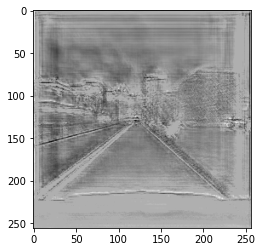

In [ ]:
pred = model(np.expand_dims(img, axis=0))
plt.imshow(pred[0,:,:,0], cmap="gray")

In [ ]:
images = np.zeros((len(image_paths), 256, 256, 3))
masks = np.zeros((len(image_paths), 256, 256, 1))

for idx, path in enumerate(image_paths): 
    images[idx] = load_image(os.path.join(base_path, path))
    masks[idx,:,:,0] = load_mask(os.path.join(seg_path, path))

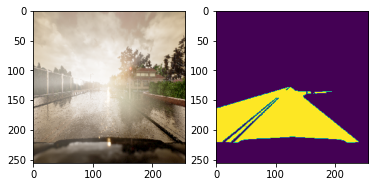

In [ ]:
fig, axs = plt.subplots(1, 2)

index = random.randint(0, len(image_paths))
axs[0].imshow(images[index])
axs[1].imshow(masks[index,:,:,0])

In [ ]:
images = tf.convert_to_tensor(images)
masks = tf.convert_to_tensor(masks)

In [ ]:
model.fit(images, masks, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 33s 1s/step - loss: 47.1572 - accuracy: 0.8051
Epoch 2/15
32/32 [==============================] - 33s 1s/step - loss: 0.4715 - accuracy: 0.8061
Epoch 3/15
32/32 [==============================] - 33s 1s/step - loss: 0.3307 - accuracy: 0.8061
Epoch 4/15
32/32 [==============================] - 33s 1s/step - loss: 0.2392 - accuracy: 0.8235
Epoch 5/15
32/32 [==============================] - 33s 1s/step - loss: 0.1598 - accuracy: 0.9348
Epoch 6/15
32/32 [==============================] - 33s 1s/step - loss: 0.0979 - accuracy: 0.9610
Epoch 7/15
32/32 [==============================] - 33s 1s/step - loss: 0.0667 - accuracy: 0.9753
Epoch 8/15
32/32 [==============================] - 33s 1s/step - loss: 0.0529 - accuracy: 0.9809
Epoch 9/15
32/32 [==============================] - 33s 1s/step - loss: 0.0414 - accuracy: 0.9853
Epoch 10/15
32/32 [==============================] - 33s 1s/step - loss: 0.0365 - accuracy: 0.9870
Epoch 11/15
32/32 

Text(0.5, 1.0, 'Predicted Mask')

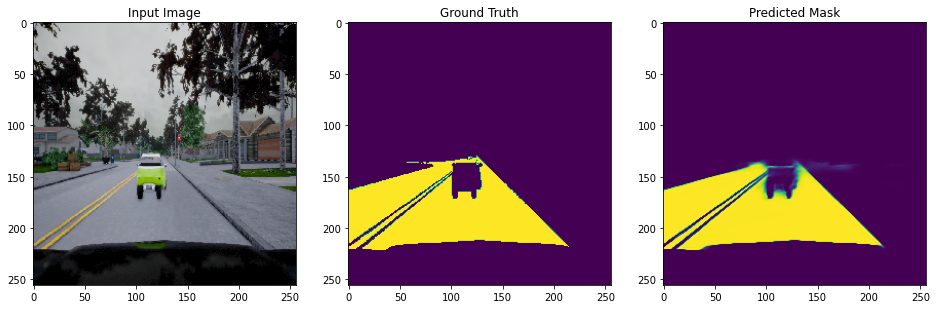

In [ ]:
index = random.randint(0, len(image_paths))

pred = model(np.expand_dims(images[index], axis=0))
fig, axs = plt.subplots(1, 3, figsize=(16, 16))
axs[0].imshow(images[index])
axs[1].imshow(masks[index,:,:,0])
axs[2].imshow(pred[0,:,:,0])

axs[0].set_title("Input Image")
axs[1].set_title("Ground Truth")
axs[2].set_title("Predicted Mask")